In [13]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

In [8]:
# Load and combine all clean data files
clean_data_path = 'CleanData'  # Make sure this is the correct path to your data
all_gesture_data = pd.DataFrame()

for filename in os.listdir(clean_data_path):
    if filename.endswith('.csv') and not filename.startswith('all_features'):  # Skip the combined file if it exists
        full_path = os.path.join(clean_data_path, filename)
        gesture_data = pd.read_csv(full_path)
        all_gesture_data = pd.concat([all_gesture_data, gesture_data], ignore_index=True)

# Display the first few rows of the combined data
all_gesture_data.head()


,mean_x,std_x,max_x,min_x,fft_peak_x,gesture
0,0.481182,0.442431,0.976651,-0.494832,3.849453,josh_thumbs_up
1,0.349992,0.732070,1.719127,-0.519970,3.076314,josh_thumbs_up
2,0.418224,0.635061,1.719127,-0.519970,3.345791,josh_thumbs_up
3,0.865998,0.389810,1.644610,0.587009,6.927987,josh_thumbs_up
4,0.654007,0.926683,1.644610,-1.281299,5.232055,josh_thumbs_up


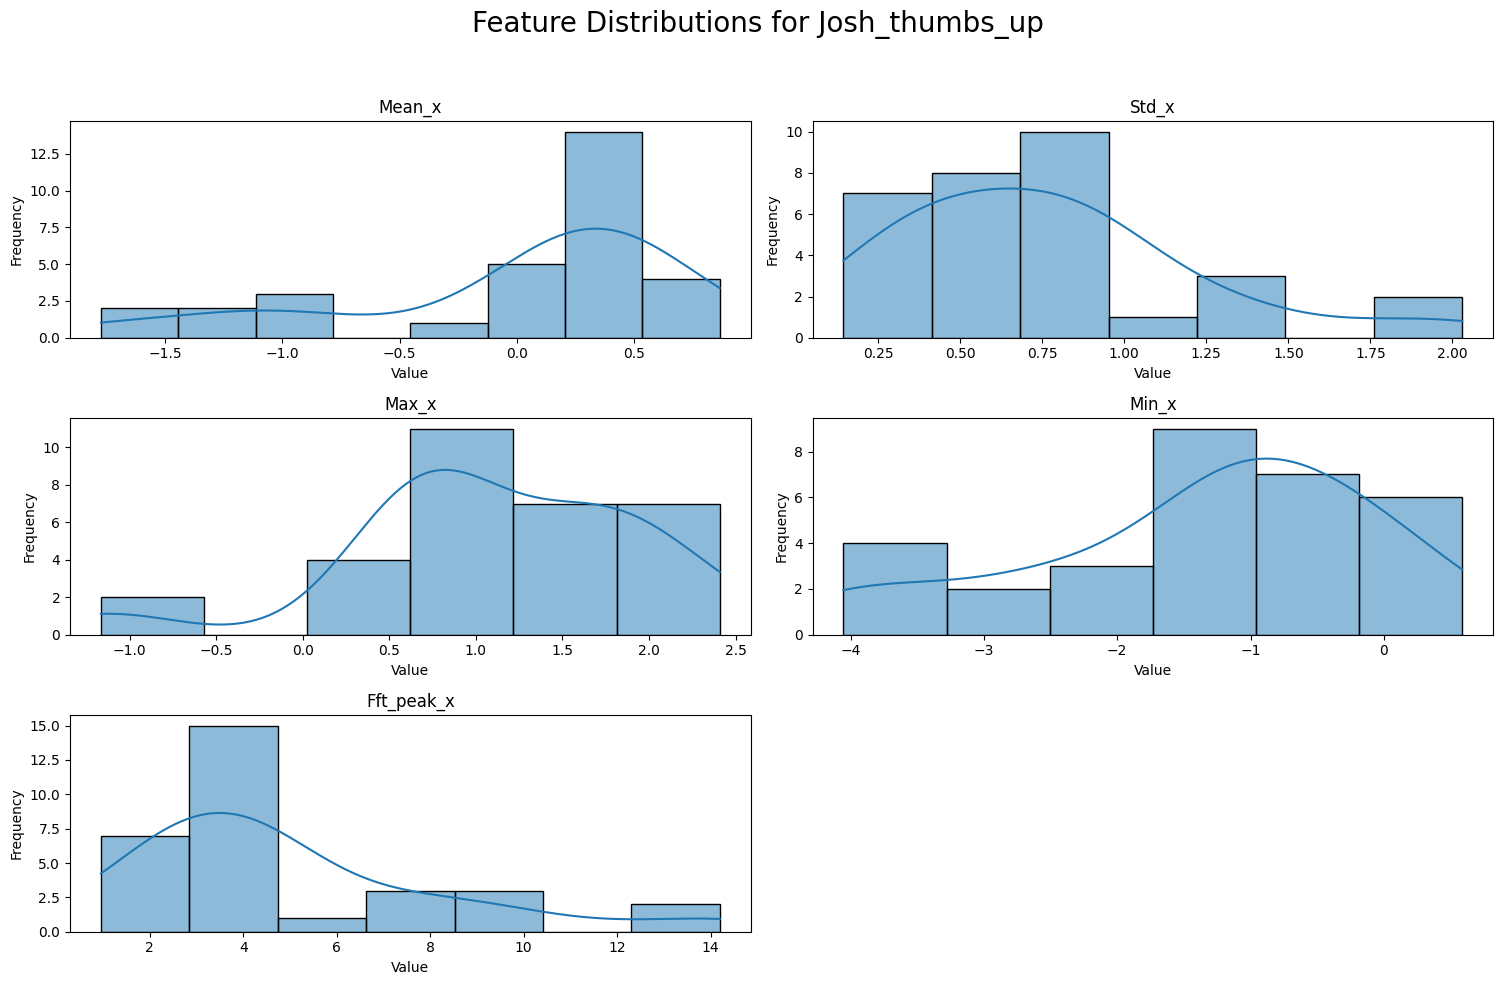

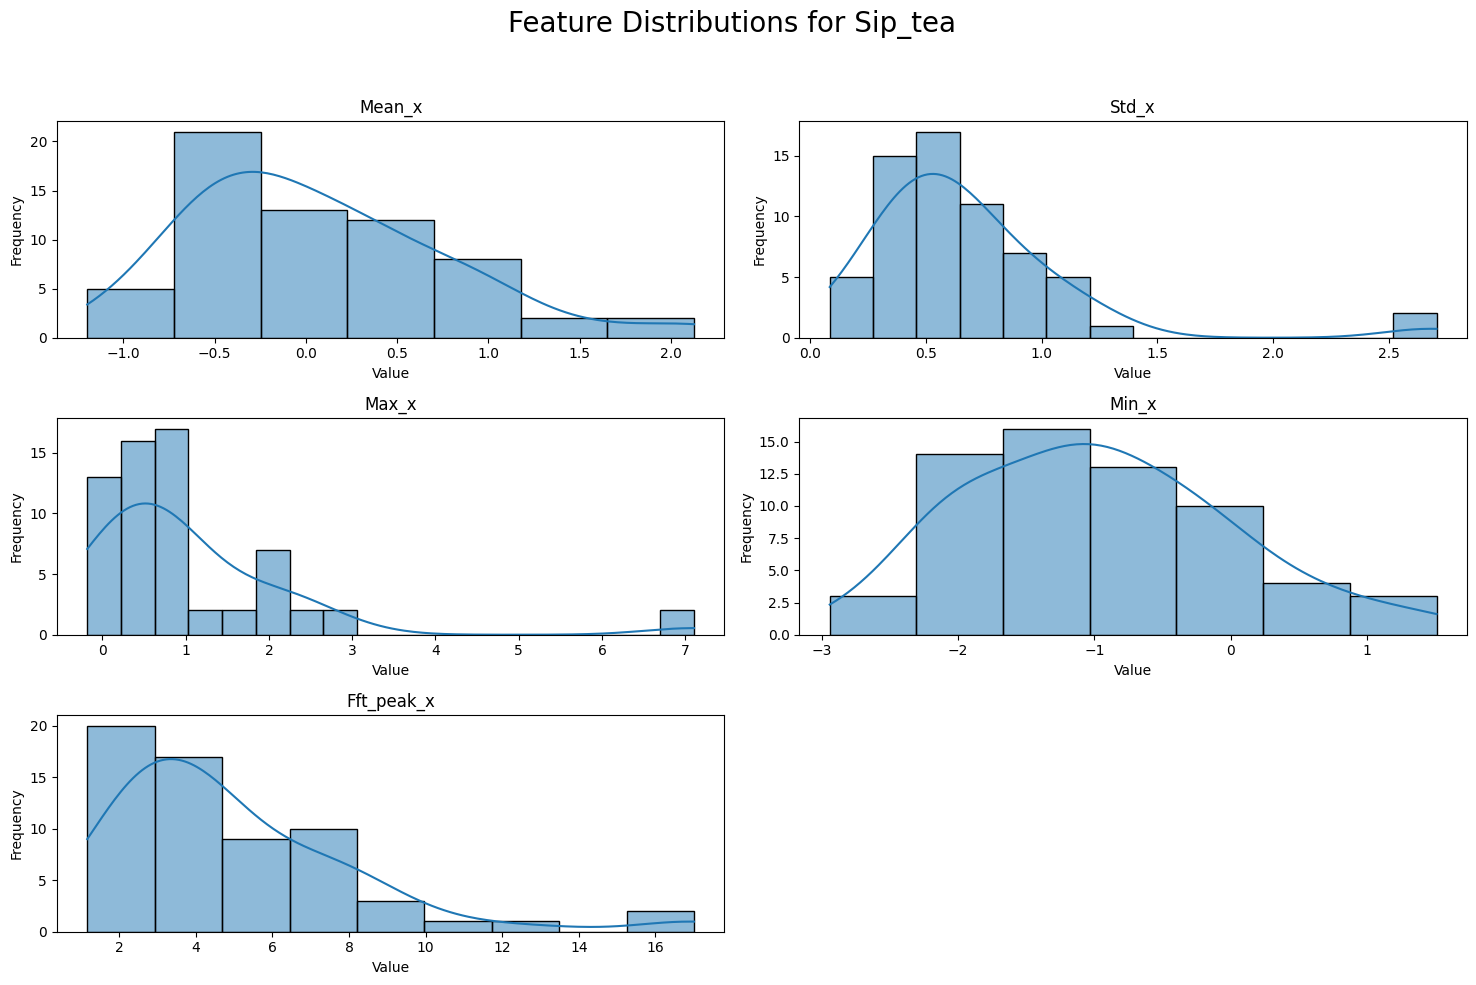

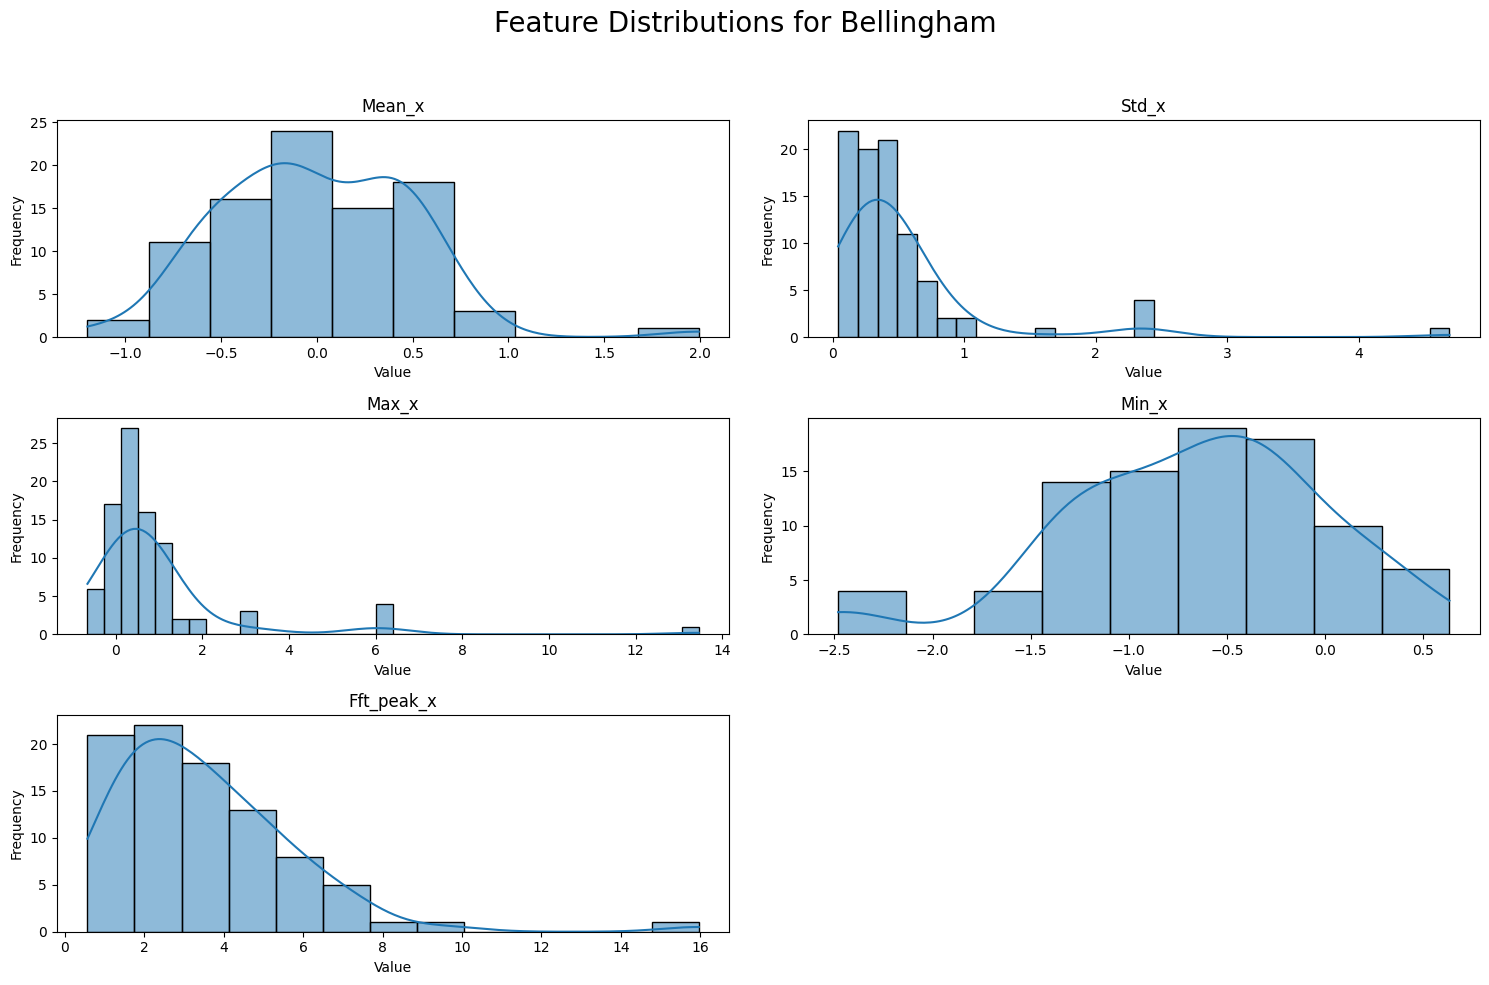

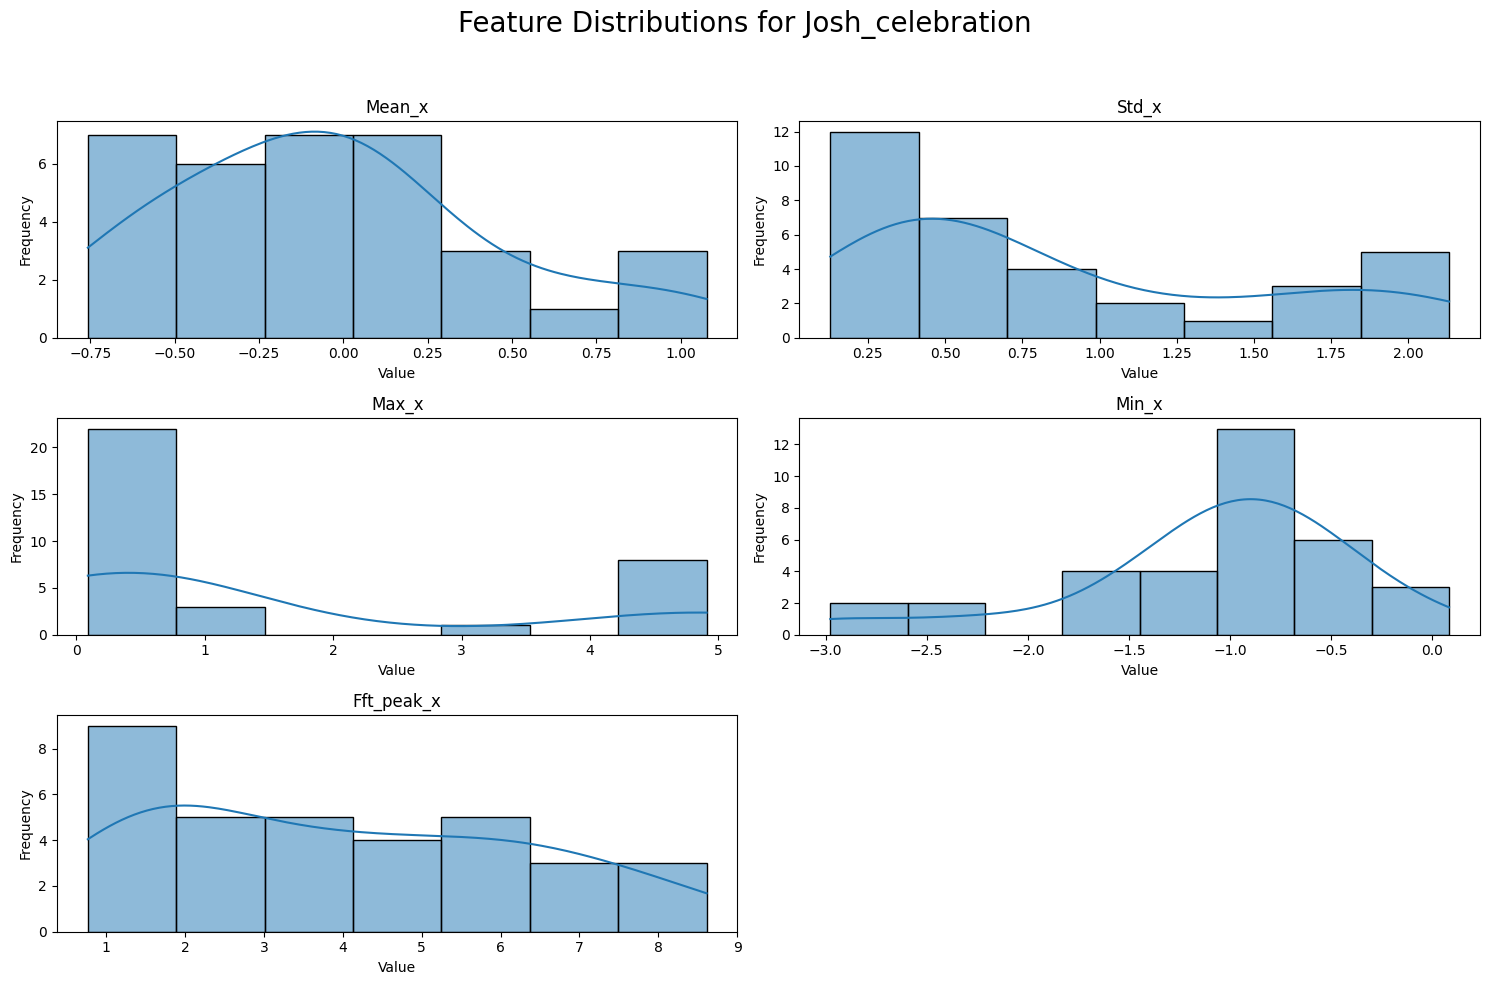

In [9]:
# Visualize the data distributions
gestures = all_gesture_data['gesture'].unique()
for gesture in gestures:
    subset = all_gesture_data[all_gesture_data['gesture'] == gesture]
    
    # Plot each feature distribution for the gesture
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Feature Distributions for {gesture.capitalize()}', fontsize=20)
    
    features = ['mean_x', 'std_x', 'max_x', 'min_x', 'fft_peak_x']
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 2, i)
        sns.histplot(subset[feature], kde=True)
        plt.title(f'{feature.capitalize()}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [10]:
# Prepare features and labels for training
X = all_gesture_data[features]
y = all_gesture_data['gesture']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6590909090909091
                  precision    recall  f1-score   support

      bellingham       0.58      0.69      0.63        16
josh_celebration       1.00      0.56      0.71         9
  josh_thumbs_up       0.62      0.83      0.71         6
         sip_tea       0.67      0.62      0.64        13

        accuracy                           0.66        44
       macro avg       0.72      0.67      0.67        44
    weighted avg       0.70      0.66      0.66        44



In [14]:
# Save the trained model to a file for later use
dump(rf_classifier, 'gesture_recognition_model.joblib')


['gesture_recognition_model.joblib']